In [55]:
from pipeline import TrainingPipeline
from data_preprocessing.feature_engineering import FeatureEngineer
from data_preprocessing.outliers_detection import OutlierProcessing
from training.data_splitting import DataSplitter

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [56]:
cleaned_data = TrainingPipeline().training_pipeline()
cleaned_data

c:\projects\ml_learn\End-To-End-Projects\Electricity_Consumption_Predictor\extract_ingest\ingest.py:25: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filePath, delimiter=';')
c:\projects\ml_learn\End-To-End-Projects\Electricity_Consumption_Predictor\data_preprocessing\type_convert.py:8: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors="coerce")


,Datetime,Global_active_power,Global_reactive_power,Sub_metering_1,Sub_metering_2,Sub_metering_3,Voltage
0,2006-12-16,1209.176,34.922,0.0,546.0,4926.0,236.243763
1,2006-12-17,3390.460,226.006,2033.0,4187.0,13341.0,240.087028
2,2006-12-18,2203.826,161.792,1063.0,2621.0,14018.0,241.231694
3,2006-12-19,1666.194,150.942,839.0,7602.0,6197.0,241.999313
4,2006-12-20,2225.748,160.998,0.0,2648.0,14063.0,242.308062
...,...,...,...,...,...,...,...
1437,2010-11-22,2041.536,142.354,4855.0,2110.0,10136.0,240.197118
1438,2010-11-23,1577.536,137.450,1871.0,458.0,7611.0,240.575528
1439,2010-11-24,1796.248,132.460,1096.0,2848.0,12224.0,240.030965
1440,2010-11-25,1431.164,116.128,1076.0,426.0,5072.0,241.536257


In [57]:
# cleaned_data['hour'] = cleaned_data['Datetime'].dt.hour
# cleaned_data['day_of_week'] = cleaned_data['Datetime'].dt.day_of_week
# cleaned_data['month'] = cleaned_data['Datetime'].dt.month
# cleaned_data['is_weekend'] = cleaned_data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
# def get_season(month):
#     if month in [12, 1, 2]:
#         return "Winter"
#     elif month in [3, 4, 5]:
#         return "Summer"
#     elif month in [6, 7, 8, 9]:
#         return "Monsoon"
#     else:
#         return "Autumn"

# # Apply function to create season column
# cleaned_data['season'] = cleaned_data['month'].apply(get_season)
# cleaned_data.drop(columns=['Datetime', "Sub_metering_1", "Sub_metering_2", "Sub_metering_3", "Global_reactive_power"], inplace=True)

cleaned_data['Datetime'] = range(1, len(cleaned_data)+1)

In [58]:
cleaned_data

,Datetime,Global_active_power,Global_reactive_power,Sub_metering_1,Sub_metering_2,Sub_metering_3,Voltage
0,1,1209.176,34.922,0.0,546.0,4926.0,236.243763
1,2,3390.460,226.006,2033.0,4187.0,13341.0,240.087028
2,3,2203.826,161.792,1063.0,2621.0,14018.0,241.231694
3,4,1666.194,150.942,839.0,7602.0,6197.0,241.999313
4,5,2225.748,160.998,0.0,2648.0,14063.0,242.308062
...,...,...,...,...,...,...,...
1437,1438,2041.536,142.354,4855.0,2110.0,10136.0,240.197118
1438,1439,1577.536,137.450,1871.0,458.0,7611.0,240.575528
1439,1440,1796.248,132.460,1096.0,2848.0,12224.0,240.030965
1440,1441,1431.164,116.128,1076.0,426.0,5072.0,241.536257


In [59]:
cleaned_data.drop(columns=["Voltage", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3", "Global_reactive_power"], inplace=True)

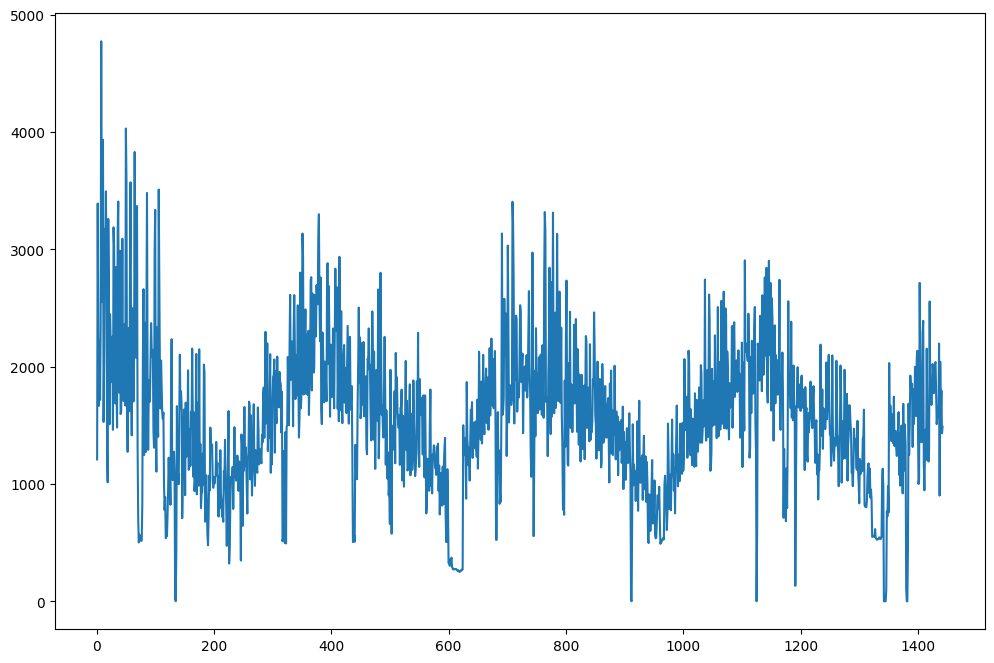

In [60]:
plt.figure(figsize=(12, 8))
plt.plot(cleaned_data['Datetime'], cleaned_data['Global_active_power'])
plt.show()

In [37]:
# f1 = FeatureEngineer()
# featured_data = f1.execute_transformation(cleaned_data, 'Voltage', "StandardScalling")
# featured_data = f1.execute_transformation(featured_data, 'Global_active_power', "StandardScalling")
# featured_data = f1.execute_transformation(featured_data, 'season', "LabelEncoding")

In [61]:
cleaned_data = OutlierProcessing().process_outliers(cleaned_data, cleaned_data.columns, "IQROutlierDetection")
cleaned_data

,Datetime,Global_active_power
0,1,1209.176
2,3,2203.826
3,4,1666.194
4,5,2225.748
5,6,1716.624
...,...,...
1437,1438,2041.536
1438,1439,1577.536
1439,1440,1796.248
1440,1441,1431.164


In [62]:
X = np.array(cleaned_data['Datetime']).reshape(-1, 1)
y = np.array(cleaned_data['Global_active_power'])

In [63]:
sx = StandardScaler()
sy = StandardScaler()

X_norm = sx.fit_transform(X.reshape(-1, 1))
y_norm = sy.fit_transform(y.reshape(-1, 1))

In [64]:
print(X_norm.shape, y_norm.shape)

(1399, 1) (1399, 1)


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1119, 1) (280, 1) (1119, 1) (280, 1)


In [66]:
X_lin_1d = np.linspace(X_norm.min(), X_norm.max(), 100).reshape(-1, 1)
X_lin_1d.shape

(100, 1)

In [67]:
errors = {}
def plot_fit_predict(model, X_norm_train, y_norm_train, X_norm_test, y_norm_test, X_lin, title, plot=True):
    model.fit(X_norm_train, y_norm_train)

    y_hat_train = model.predict(X_norm_train).reshape(-1, 1)
    y_hat_test = model.predict(X_norm_test).reshape(-1, 1)
    y_hat_lin = model.predict(X_lin).reshape(-1, 1)

    # Inverse transform predictions and actual labels
    y_hat_train = sy.inverse_transform(y_hat_train)
    y_hat_test = sy.inverse_transform(y_hat_test)
    y_hat_lin = sy.inverse_transform(y_hat_lin)

    y_train_orig = sy.inverse_transform(y_norm_train.reshape(-1, 1))
    y_test_orig = sy.inverse_transform(y_norm_test.reshape(-1, 1))

    errors[title] = {
        "train": mean_squared_error(y_train_orig, y_hat_train),
        "test": mean_squared_error(y_test_orig, y_hat_test)
    }

    if plot:
        plt.plot(sx.inverse_transform(X_norm_train), y_train_orig, 'o', label='train', markersize=1)
        plt.plot(sx.inverse_transform(X_norm_test), y_test_orig, 'o', label='test', ms=3)
        plt.plot(sx.inverse_transform(X_lin), y_hat_lin, label='model')
        plt.xlabel('Months since first measurement')
        plt.ylabel('CO2 Levels')
        plt.legend()
        plt.title('{}\n Train MSE: {:.2f} | Test MSE: {:.2f}'.format(
            title, errors[title]["train"], errors[title]["test"]))

    return errors[title]


{'train': 288219.0785206065, 'test': 315923.8897790138}

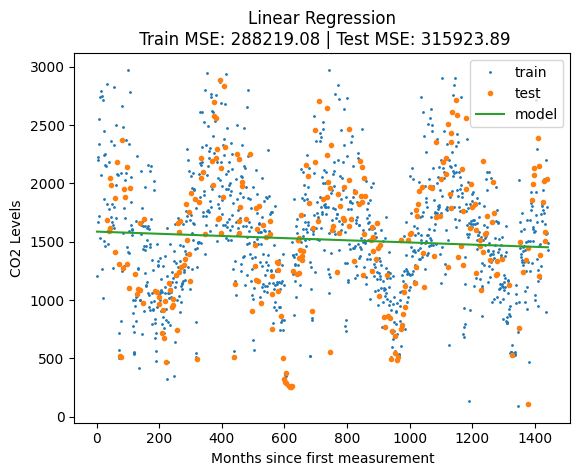

In [68]:
model = LinearRegression()
plot_fit_predict(model, X_train, y_train, X_test, y_test, X_lin_1d, "Linear Regression")

c:\projects\ml_learn\End-To-End-Projects\Electricity_Consumption_Predictor\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'train': 161518.6326095244, 'test': 148676.91065330198}

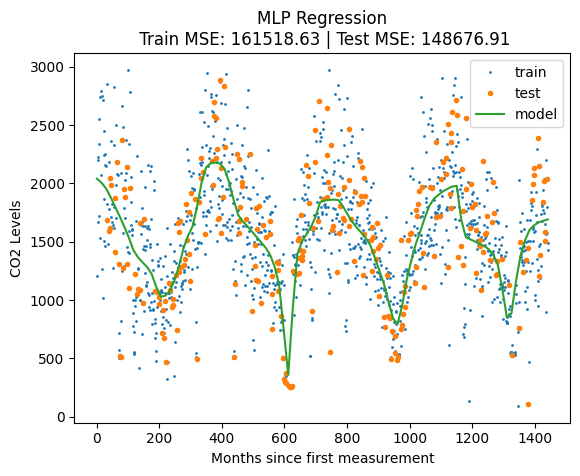

In [70]:
mlp_model = MLPRegressor(hidden_layer_sizes=[128, 256, 512, 1024, 512, 256, 128], max_iter = 10000)

plot_fit_predict(mlp_model, X_train, y_train, X_test, y_test, X_lin_1d, "MLP Regression")